In [2]:
# First install download preparing data

import piplite
await piplite.install('openpyxl==3.0.9')

In [3]:
import numpy as np
import pandas as pd

In [6]:
from js import fetch
import io

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = await fetch(url)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df_can = pd.read_excel(
    text,
    sheet_name = 'Canada by Citizenship',
    skiprows = range(20),
    skipfooter = 2)
print = (' Data download and read into a dataframe')

## Visualization Data using Matplotlib

In [13]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__) 

<class 'TypeError'>: 'str' object is not callable

In [21]:
df_can.rename(columns = {'OdName': 'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace = True)
df_can.columns   

Index([     'Type',  'Coverage',   'Country',      'AREA', 'Continent',
             'REG',    'Region',       'DEV',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [27]:
# This is riging up an error because column are already dropped. 
# Check code line below.

df_can.drop(['REG', 'DEV', 'DevName', 'AREA'], axis=1, inplace=True)

<class 'KeyError'>: "['REG', 'DEV', 'DevName', 'AREA'] not found in axis"

## Pie Charts 

In [28]:
df_can.head()

,Type,Coverage,Country,Continent,Region,1980,1981,1982,1983,1984,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,16,39,39,47,71,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,1,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,80,67,71,69,63,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [33]:
# creating a pie chart we need to collect the data
# we will use the groupby function by continent.

# the output of the function groupby method is a groupby object.
# we can not use it further unitol we apply a function .sum())
df_cont = df_can.groupby('Continent', axis=0).sum()
print(type(df_can.groupby('Continent', axis=0)))
df_cont.head()

# error is posting but dataframe is created. Check code below

<class 'TypeError'>: 'str' object is not callable

In [34]:
df_cont.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503


In [42]:
# add a total colum and them sum the column for the total

df_cont['Total'] =df_cont.sum(axis=1)
df_cont.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,1856844
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,9953382
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,4232841
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,2295444
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,723426


# plot the data kind = 'pie'

side notes for the pie function

* autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
* startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
* shadow - Draws a shadow beneath the pie (to give a 3D feel).


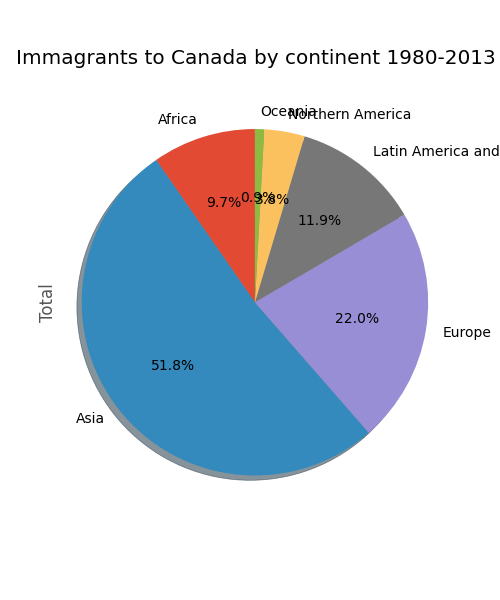

<Figure size 500x600 with 0 Axes>

In [40]:
df_cont['Total'].plot(kind = 'pie', 
             figsize = (5,6),
             autopct = '%1.1f%%', #odd in percentages
             startangle =90, # adds the pie chart by angle
             shadow = True,) # draws a 3d shadow

plt.title ('Immagrants to Canada by continent 1980-2013')
plt.axis('equal')

plt.show()

##### lets add some modifiacations to the pie chart 
*  remove the text labelsin the pie chart by using plt.legend() as seperate legend
*  push out the percentages to sit outside the chart using pctdistance
*  use a custom set of colors for continents by passing in colors parameters
*  explode the pie chart and emphasize the lowest thres countries.

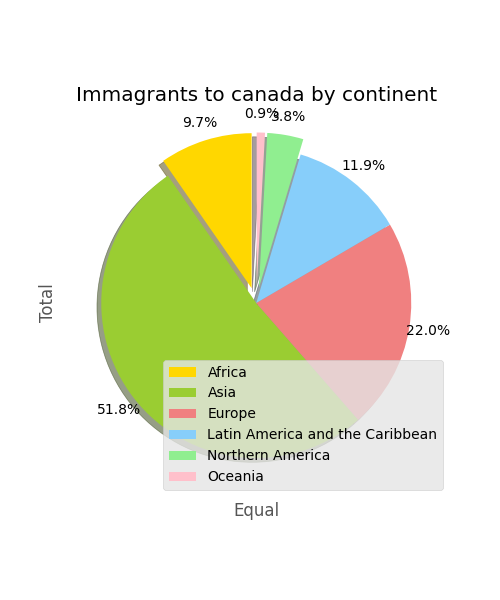

<Figure size 500x600 with 0 Axes>

In [63]:
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue', 'lightgreen', 'pink']
explode_list = [.1,0,0,0,.1,.1] # ratio or each continent with which to offset each edge

df_cont['Total'].plot(kind ='pie',
                      figsize =(5, 6),
                      autopct = '%1.1f%%',
                      startangle = 90,
                      shadow = True,
                      labels = None, # turning off labels
                      pctdistance = 1.12, # the ratio between the center of each pie slice and the trust of the text generated by autopct 
                      colors = colors_list, # add custom colors
                      explode = explode_list # 'explode' lowest 3 continents
                     )
plt.title('Immagrants to canada by continent')
plt.xlabel('Equal')

plt.legend(labels = df_cont.index, loc='lower right')

plt.show()

Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

You might need to play with the explore values in order to fix any overlapping slice values.

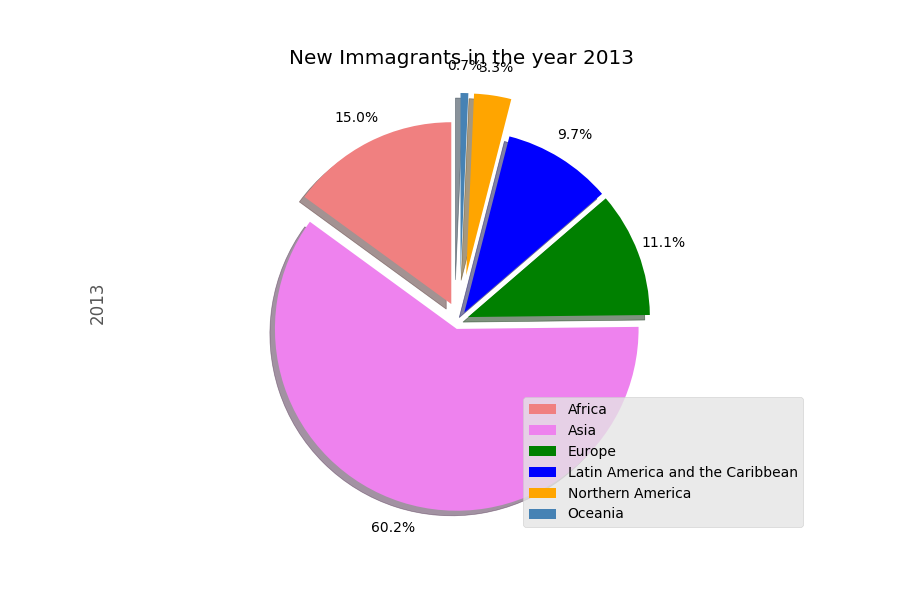

<Figure size 900x600 with 0 Axes>

In [119]:
color_list = ['Lightcoral', 'violet', 'green', 'blue', 'orange','steelblue']
explode_list = [.1, .05, .05, .05, .25, .25]

df_cont[2013].plot( kind = 'pie',
                   figsize = (9, 6),
                   startangle=90,
                   shadow= True,
                   labels= None,
                   autopct='%1.1f%%',
                   pctdistance = 1.15,
                   colors = color_list,
                   explode = explode_list
                    )

plt.title('New Immagrants in the year 2013')
plt.axis('Equal')

plt.legend(labels = df_cont.index, loc='lower right')
plt.show()
                     

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,1856844
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,9953382
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,4232841
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,2295444
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,723426


## Box Plots

* Minimum: The smallest number in the dataset excluding the outliers.
* First quartile: Middle number between the minimum and the median.
* Second quartile (Median): Middle number of the (sorted) dataset.
* Third quartile: Middle number between median and maximum.
* Maximum: The largest number in the dataset excluding the outliers.

plot the box plot for the Japanese immagrant between 1980-2013.

In [97]:
# get the subset of data 

years=list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [127]:
df_can.set_index('Country', inplace = True)

In [128]:
df_can.columns = list(map(str, df_can.columns))


In [129]:
df_japan = df_can.loc[["Japan"], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


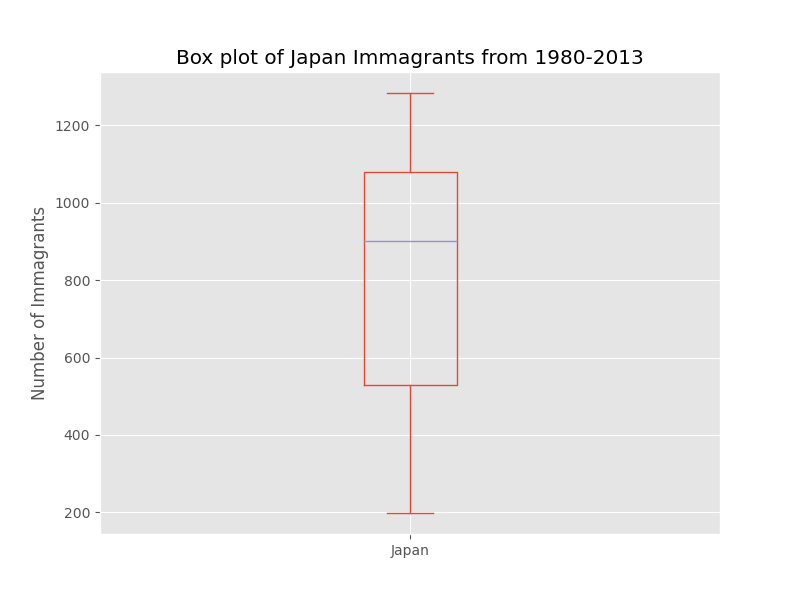

<Figure size 800x600 with 0 Axes>

In [132]:
df_japan.plot(kind ='box', figsize=(8,6))

plt.title('Box plot of Japan Immagrants from 1980-2013')
plt.ylabel('Number of Immagrants')

plt.show()

In [134]:
# the .describe also plays as a boxplot

df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [135]:
# gather data and create new data frame

df_other = df_can.loc[['China','India'], years].transpose()
df_other.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [136]:
# look at the statistical measures

df_other.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


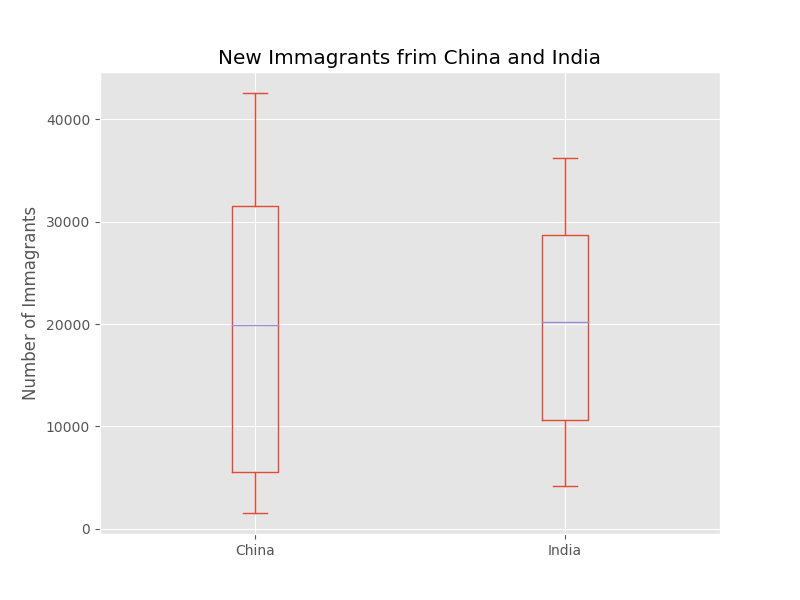

<Figure size 800x600 with 0 Axes>

In [138]:
# plot data

df_other.plot(kind = 'box', figsize=(8,6))

plt.title('New Immagrants frim China and India')
plt.ylabel('Number of Immagrants')

plt.show()

## Horizontal Box Plots

<AxesSubplot:>

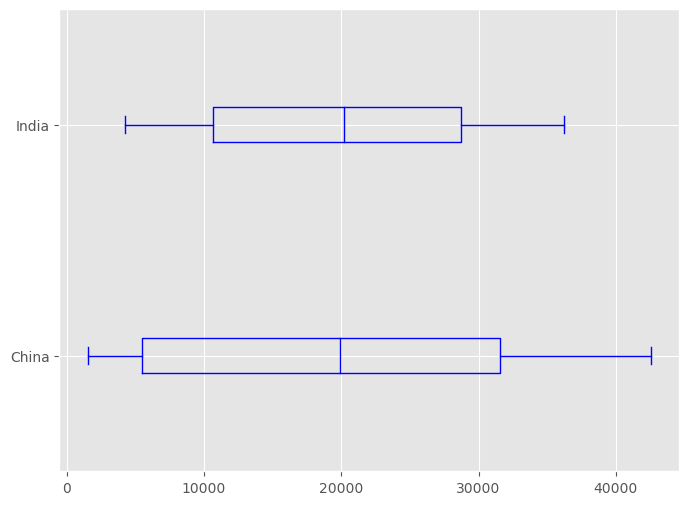

In [139]:
df_other.plot(kind = 'box', figsize =(8,6), vert=False, color='blue')

***Subplots***
To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
plot_number is used to identify the particular subplot that this function is to create within the notional grid. plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols

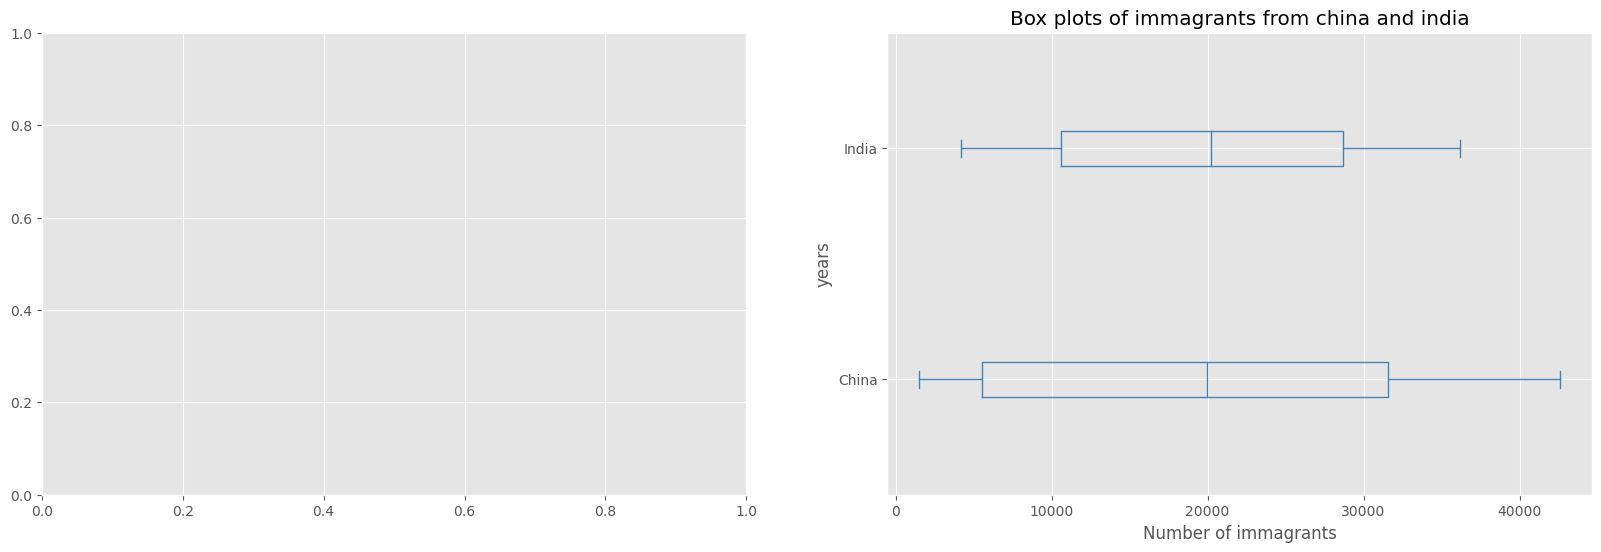

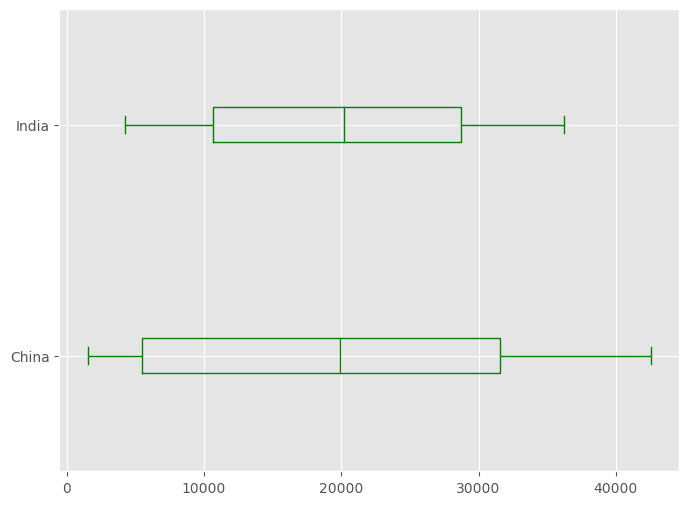

<class 'AttributeError'>: 'Figure' object has no attribute 'set_title'

In [145]:
# this allows you to specify and place each plotby passing in the ax parameter
# subplot(211) == subplot(2, 1, 1)


fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1( 1 row, 2 columns, first plot)
ax0 = fig.add_subplot(1, 2, 2) # add subplot 2( 1 row, 2 columns, first plot)

# subplot #1
df_other.plot(kind = 'box', color = 'steelblue', vert = False, figsize = (20,6), ax=ax0) # add to subplot 1
ax0.set_title('Box plots of immagrants from china and india')
ax0.set_xlabel('Number of immagrants')
ax0.set_ylabel('years')


# subplot #2
df_other.plot(kind = 'box', color='green', figsize=(8,6), vert=False)
ax1 =fig.set_title('line plots of immagrants fro china and india')
ax1 =fig.set_ylabel('number of immagrants')
ax1 =fig.set_xlabel('years')

plt.show()

***Question***: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

In [162]:
df_cont.sort_values(by = 'Total', ascending = False, axis = 0, inplace = True)
df_top15 = df_can.head(15)
df_top15.head()

,Type,Coverage,Continent,Region,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,Asia,Southern Asia,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,Europe,Southern Europe,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,Africa,Northern Africa,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,Oceania,Polynesia,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,Europe,Southern Europe,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

In [183]:
years = list(map(str,range(1980,1990)))
years1 = list(map(str,range(1990,2000)))
years2 = list(map(str, range(2000, 2010)))
                 

In [184]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989']

In [185]:
years1

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999']

In [186]:
years2

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009']

In [187]:
# slicing dataframes

df_80s = df_top15.loc[:, years].sum(axis=1)
df_90s = df_top15.loc[:, years1].sum(axis=1)
df_00s = df_top15.loc[:, years2].sum(axis=1)

In [188]:
# merging tables together

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_00s})

# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
Afghanistan,3693,15845,30501
Albania,9,2568,10799
Algeria,1271,13153,37833
American Samoa,3,2,1
Andorra,2,6,5


In [189]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,1215.800000,4379.466667,8966.000000
std,1637.712917,6352.704338,13062.482224
min,0.000000,2.000000,1.000000
25%,6.000000,216.500000,212.500000
50%,243.000000,602.000000,1755.000000
75%,2172.000000,6130.000000,9844.500000
max,4564.000000,18532.000000,37833.000000


<AxesSubplot:>

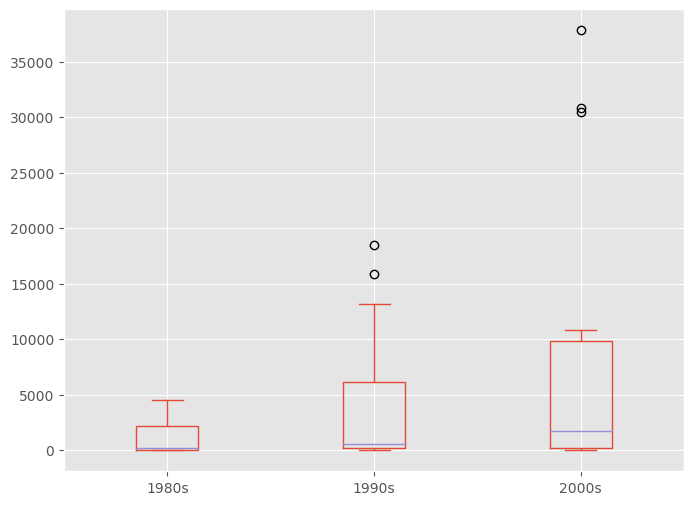

In [190]:
new_df.plot(kind = 'box', figsize = (8,6))

<AxesSubplot:>

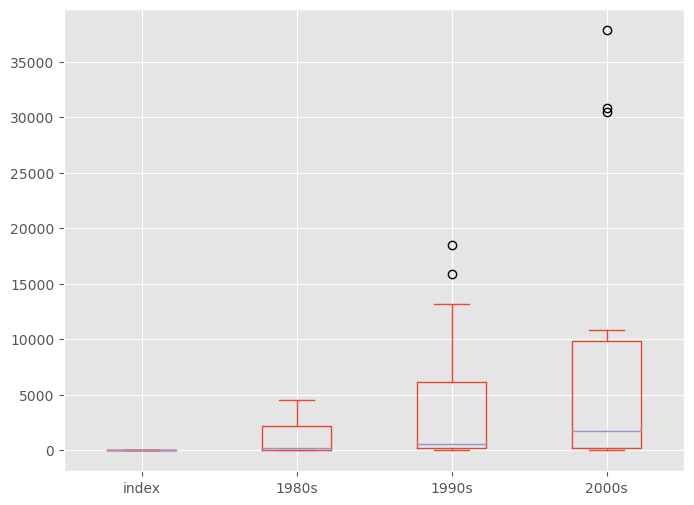

In [192]:
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

new_df.plot(kind='box', figsize=(8,6))

## Scatter Plots

Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [195]:
# get the data, make sure to convert the years into int type
# use the sum() method to get the toal population per year

df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# chainging years to type
df_tot.index = map(int, df_tot.index)

# Resetting the index
df_tot.reset_index(inplace = True)

#renaming columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Plot the data. In Matplotlib, we can create a scatter plot set by passing in kind='scatter' as plot argument.

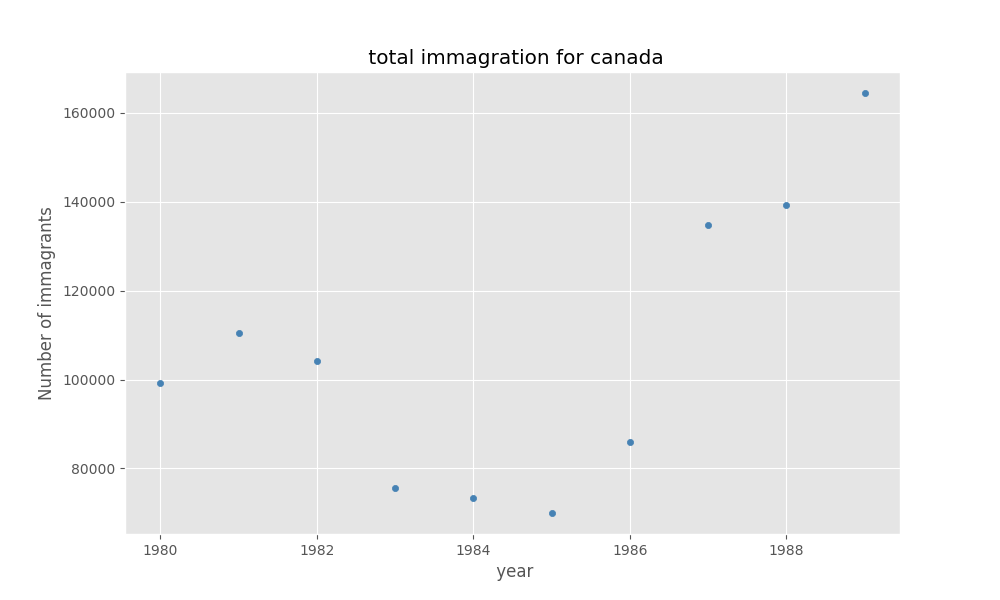

<Figure size 1000x600 with 0 Axes>

In [197]:
df_tot.plot(kind = 'scatter', figsize=(10,6), x = 'year', y = 'total', color = 'steelblue')
plt.title(' total immagration for canada')
plt.xlabel(' year')
plt.ylabel('Number of immagrants')

plt.show()

plotting a reagression line with line best fit for the chart above
use this to predict immagrants in 2015

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

* x: x-coordinates of the data.
* y: y-coordinates of the data.
* deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [198]:
x = df_tot['year'] # year on x axis
y = df_tot['total'] # year on y axis
fit = np.polyfit(x,y,deg=1)
fit

array([ 5.87521818e+03, -1.15536232e+07])

'No. Immigrants = 5875 * Year + -11553623'

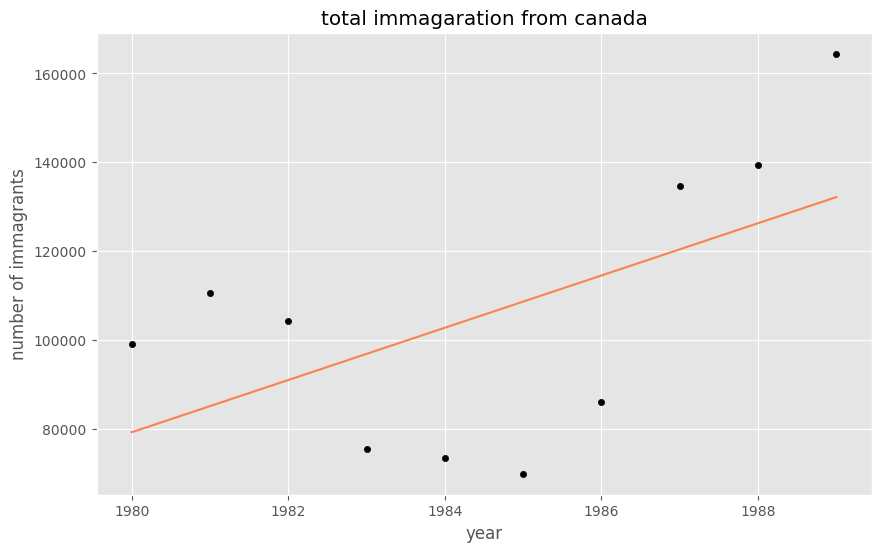

In [204]:
# plotting the regression line

df_tot.plot(kind= 'scatter', x ='year', y ='total', color='black', figsize=(10,6))
       
plt.title('total immagaration from canada')
plt.xlabel('year')
plt.ylabel('number of immagrants')
            
plt.plot(x,fit[0] * x + fit[1], color="coral") # recall that x is the year 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

 Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

In [205]:
years = list(map(str,range(1980, 2014)))
years

df_dns = df_can.loc[['Denmark', 'Norway','Sweden'], years]
df_dns.head(5)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [210]:
# use the sum() method to get the toal population per year
df_dns = pd.DataFrame(df_can[years].sum(axis=0))

# chainging years to type
df_dns.index = (map(int, df_dns.index))

# Resetting the index
df_dns.reset_index(inplace=True)

#renaming columns
df_dns.columns=['Year', 'Total']

# view the final dataframe
df_dns.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<AxesSubplot:xlabel='Year', ylabel='Total'>

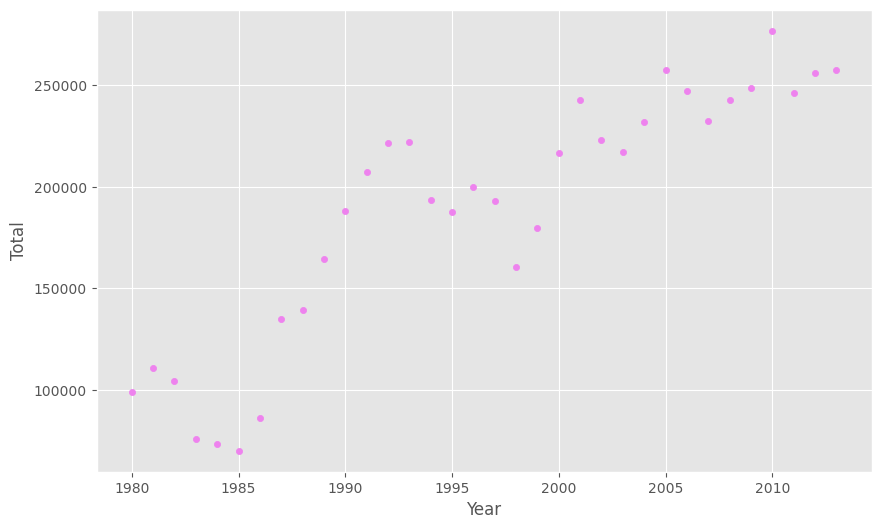

In [215]:
df_dns.plot(kind = 'scatter', figsize =(10,6), y='Total', x='Year', color = 'violet')


## Bubble Plots

A **bubble plot** is a variation of the **scatter plot** that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable **z**, also known as the weight. In **maplotlib**, we can pass in an array or scalar to the parameter **s** to **plot()**, that contains the weight of each point.

Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and include it in the dataframe.

In [216]:
# get the data 
df_ba = df_can.loc[['Brazil','Argentina'], years].transpose()
df_ba.head()

Country,Brazil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


In [219]:
# cast the years into int type
df_ba.index=(map(int, df_ba.index))

# label the index, this will be in the column name when we reset the index
df_ba.index.name = 'Year'

# reset the index
df_ba.reset_index(inplace=True)

# view changes
df_ba.head()

Country,Year,Brazil,Argentina
0,1980,211,368
1,1981,220,426
2,1982,192,626
3,1983,139,241
4,1984,145,237


Creat normalized Weight

* There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0, 1].
* where  
X
  is the original value,  
X
′
  is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly

In [241]:
# normalize Brazil data
norm_brazil = (df_ba['Brazil'] - df_ba['Brazil'].min()) / (df_ba['Brazil'].max() - df_ba['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_ba['Argentina'] - df_ba['Argentina'].min()) / (df_ba['Argentina'].max() - df_ba['Argentina'].min())

Plot the data 

* multiply weights by 2000 to scale it up on the graph, and,
* add 10 to compensate for the min value (which has a 0 weight and therefore scale with  
×
2000
 ).

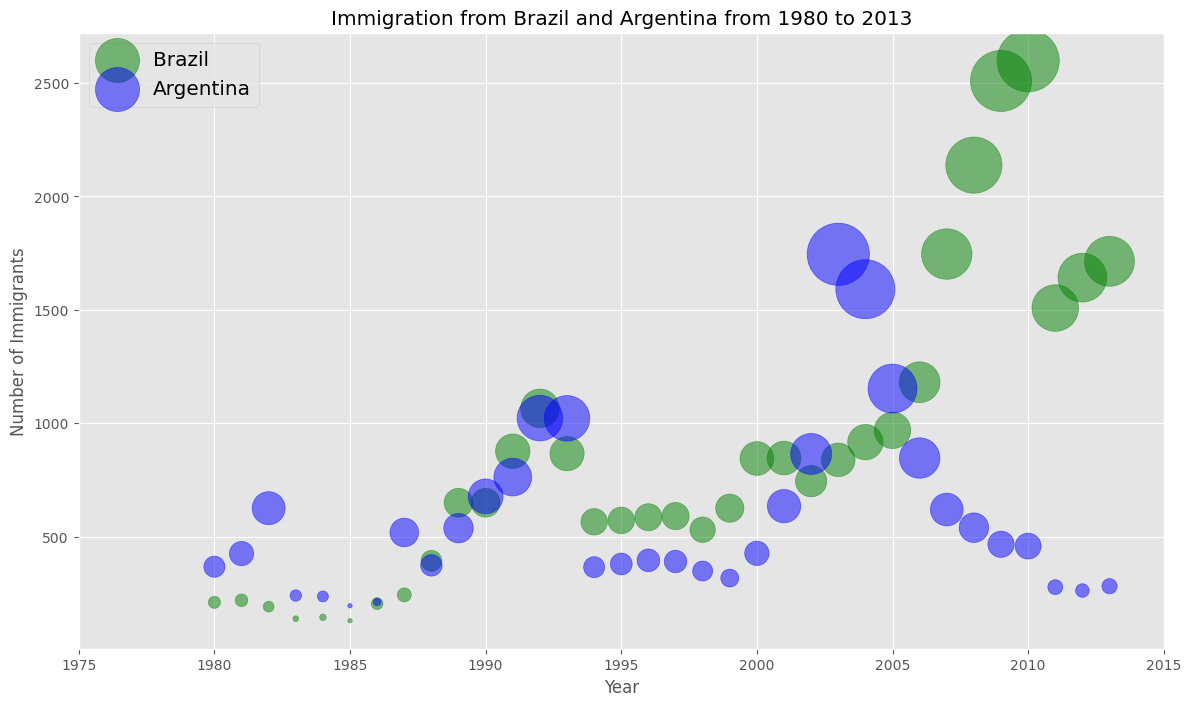

In [242]:
ax0 = df_ba.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_ba.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

In [264]:
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

In [265]:
# Normalize the data pertaining to China and India

df_CI.index=(map(int, df_CI.index))
df_CI.index.name ='Year'
df_CI.reset_index(inplace = True)
df_CI.head()

Country,Year,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147
3,1983,1863,7338
4,1984,1527,5704


In [266]:
# normalize china
norm_china = (df_CI - df_CI['China'].min()) / df_CI['China'].max() - df_CI['China'].min()

# Normalize India
norm_india = (df_CI['India'] - df_CI['India'].min()) / df_CI['India'].max() - df_CI['India'].min()

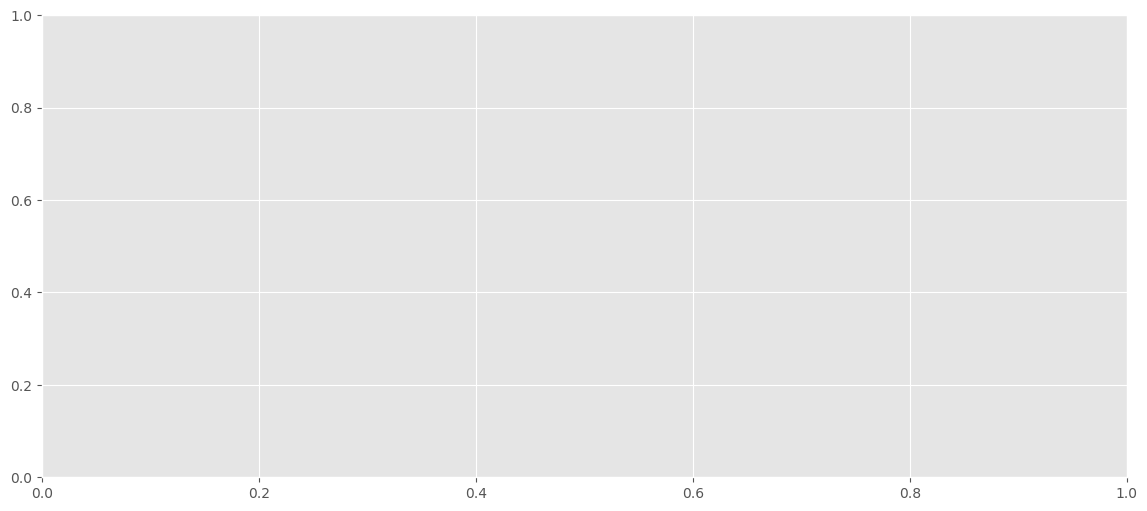

<class 'ValueError'>: s must be a scalar, or float array-like with the same size as x and y

In [268]:
# Generate bubble plots

   
    # China
ax0 = df_CI.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 6),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

    # India
ax1 = df_CI.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )


ax0.set_title('Immagration from China and India')
ax0.set_ylabel('Number of Immagrants')
ax0.legend(['China','India'], loc='upper left', fontsize ='x-large')